# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
df = pd.read_csv('covid_19_clean_complete 17032020.csv', parse_dates=['Date'])

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


# Preprocessing 

### Cleaning data

In [4]:
# cases
cases=['Confirmed', 'Deaths', 'Recovered', 'Active']

#Active Cases = confirmed - deaths - recovered
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

#Replace Mainland china with just China
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

#filling missing values
df[['Province/State']]= df[['Province/State']].fillna('')
df[cases]=df[cases].fillna(0)                            

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [6]:
df.shape

(13015, 9)

### Derived Tables

Given that there are many cases in cruise ships did not classify which country they are from, we will separate the cases in cruise ships. 


In [7]:
# cases in the ships
ship = df[df['Province/State'].str.contains('Princess')|df['Province/State']
          .str.contains('Cruise Ship')]
#China and the Rest of the world
China = df[df['Country/Region']=='China']
ROW = df[df['Country/Region']!='China']


#Grouped data
df_grouped = df.groupby(['Country/Region', 'Province/State', 'Date'])['Confirmed', 'Deaths', 
                                                                      'Recovered', 'Active'].sum().reset_index()
China_grouped = China.groupby(['Province/State', 'Date'])['Confirmed', 'Deaths', 'Recovered', 
                                                          'Active'].sum().reset_index()
ROW_grouped = ROW.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered', 
                                                      'Active'].sum().reset_index()

#New Cases
df_grouped['New Case'] = df_grouped.groupby(['Country/Region', 'Province/State'])['Confirmed'].diff()
df_grouped['New Case']=df_grouped['New Case'].fillna(0)

China_grouped['New Case'] = China_grouped.groupby('Province/State')['Confirmed'].diff()
China_grouped['New Case']=China_grouped['New Case'].fillna(0)

ROW_grouped['New Case'] = ROW_grouped.groupby('Country/Region')['Confirmed'].diff()
ROW_grouped['New Case']=ROW_grouped['New Case'].fillna(0)

#Latest
df_latest = df_grouped[df_grouped['Date']== max(df_grouped['Date'])].reset_index()
China_latest = df_latest[df_latest['Country/Region']=='China']
ROW_latest = df_latest[df_latest['Country/Region']!='China']

#Latest grouped
df_latest_grouped = df_latest.groupby(['Country/Region'])['Confirmed', 
                                                        'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()
China_latest_grouped = China_latest.groupby('Province/State')['Confirmed', 
                                                        'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()
ROW_latest_grouped = ROW_latest.groupby('Country/Region')['Confirmed', 
                                                        'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()

In [8]:
df_grouped

,Country/Region,Province/State,Date,Confirmed,Deaths,Recovered,Active,New Case
0,Afghanistan,,2020-01-22,0,0,0,0,0.0
1,Afghanistan,,2020-01-23,0,0,0,0,0.0
2,Afghanistan,,2020-01-24,0,0,0,0,0.0
3,Afghanistan,,2020-01-25,0,0,0,0,0.0
4,Afghanistan,,2020-01-26,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
13010,Vietnam,,2020-03-17,66,0,16,50,5.0
13011,occupied Palestinian territory,,2020-03-14,0,0,0,0,0.0
13012,occupied Palestinian territory,,2020-03-15,0,0,0,0,0.0
13013,occupied Palestinian territory,,2020-03-16,0,0,0,0,0.0


In [9]:
China_grouped

,Province/State,Date,Confirmed,Deaths,Recovered,Active,New Case
0,Anhui,2020-01-22,1,0,0,1,0.0
1,Anhui,2020-01-23,9,0,0,9,8.0
2,Anhui,2020-01-24,15,0,0,15,6.0
3,Anhui,2020-01-25,39,0,0,39,24.0
4,Anhui,2020-01-26,60,0,0,60,21.0
...,...,...,...,...,...,...,...
1843,Zhejiang,2020-03-13,1215,1,1197,17,0.0
1844,Zhejiang,2020-03-14,1227,1,1211,15,12.0
1845,Zhejiang,2020-03-15,1231,1,1211,19,4.0
1846,Zhejiang,2020-03-16,1231,1,1216,14,0.0


In [10]:
China_latest_grouped

,Province/State,Confirmed,Deaths,Recovered,Active,New Case
0,Anhui,990,6,984,0,0.0
1,Beijing,456,8,369,79,4.0
2,Chongqing,576,6,570,0,0.0
3,Fujian,296,1,295,0,0.0
4,Gansu,133,2,91,40,0.0
5,Guangdong,1364,8,1307,49,3.0
6,Guangxi,253,2,248,3,1.0
7,Guizhou,147,2,144,1,1.0
8,Hainan,168,6,161,1,0.0
9,Hebei,318,6,310,2,0.0


In [11]:
df_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active,New Case
0,Afghanistan,22,0,1,21,1.0
1,Albania,55,1,0,54,4.0
2,Algeria,60,4,12,44,6.0
3,Andorra,39,0,1,38,37.0
4,Antigua and Barbuda,1,0,0,1,0.0
...,...,...,...,...,...,...
154,Uruguay,29,0,0,29,21.0
155,Uzbekistan,10,0,0,10,4.0
156,Venezuela,33,0,0,33,16.0
157,Vietnam,66,0,16,50,5.0


# Data Exploration

## Percentage of Recovered, Death and Active cases

### Worldwide

In [12]:
daily_total = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
current_total = daily_total[daily_total['Date']==max(daily_total['Date'])].reset_index(drop=True)

In [13]:
current_total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-17,197168,7905,80840,108423


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


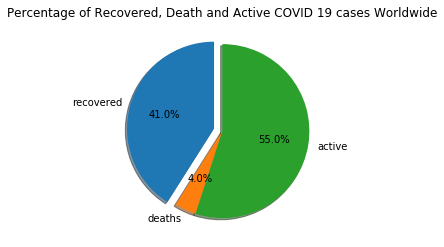

In [14]:
labels = 'recovered', 'deaths', 'active'
sizes=[current_total['Recovered'], current_total['Deaths'], current_total['Active']]
explode=(0.1, 0, 0)
plt.pie(x=sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases Worldwide')
plt.show()

The pie above shows that 41.0% of worldwide confirmed cases have recovered and the mortality rate is 4.0%

### China

In [15]:
daily_china=China.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
China_current = daily_china[daily_china['Date']==max(daily_china['Date'])].reset_index(drop=True)

In [16]:
China_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-17,81058,3230,68798,9030


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


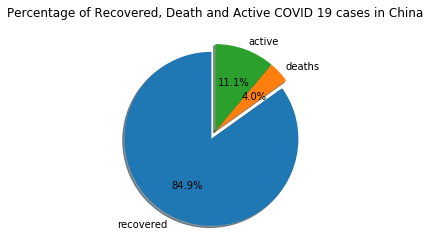

In [17]:
labels = 'recovered', 'deaths', 'active'
sizes=[China_current['Recovered'], China_current['Deaths'], China_current['Active']]
explode=(0.1, 0, 0)
plt.pie(x=sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases in China')
plt.show()

There are 84.9% people who confirmed COVID 19 in China have recovered and there are only 11.1% cases still active

### The rest of the world

In [18]:
daily_ROW=ROW.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
ROW_current = daily_ROW[daily_ROW['Date']==max(daily_ROW['Date'])].reset_index(drop=True)

In [19]:
ROW_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-17,116110,4675,12042,99393


C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


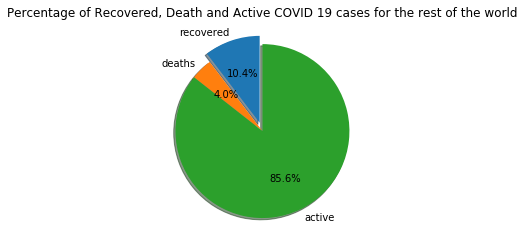

In [20]:
labels = 'recovered', 'deaths', 'active'
sizes=[ROW_current['Recovered'], ROW_current['Deaths'], ROW_current['Active']]
explode=(0.1, 0, 0)
plt.pie(x=sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases for the rest of the world')
plt.show()

There are 10.4% COVID cases recovered and 85.6% still active for the rest of the world

### Cruise Ships

In [21]:
daily_ship=ship.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
ship_current = daily_ship[daily_ship['Date']==max(daily_ship['Date'])].reset_index(drop=True)

C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


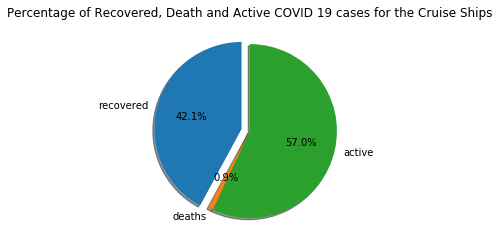

In [22]:
labels = 'recovered', 'deaths', 'active'
sizes=[ship_current['Recovered'], ship_current['Deaths'], ship_current['Active']]
explode=(0.1, 0, 0)
plt.pie(x=sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases for the Cruise Ships')
plt.show()

In [23]:
ship_current

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-17,772,7,325,440


For people got the COVID 19 on the cruise ships, the death rate is 0.9% and there are 57.0% cases still active. 

## Countrywise Data

### Confirmed, Death, Recovered, Active and New cases in each country

In [24]:
confirmed_df = df_latest_grouped.sort_values(by='Confirmed', ascending=False)
confirmed_df = confirmed_df.reset_index(drop=True)
confirmed_df.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active,New Case
0,China,81058,3230,68798,9030,25
1,Italy,31506,2503,2941,26062,3526
2,Iran,16169,988,5389,9792,1178
3,Spain,11748,533,1028,10187,1806
4,Germany,9257,24,67,9166,1985
5,"Korea, South",8320,81,1407,6832,84
6,France,7683,148,12,7523,1024
7,US,6421,108,17,6296,1789
8,Switzerland,2700,27,4,2669,500
9,United Kingdom,1960,56,53,1851,409


### Death reported in coutries

In [25]:
# Calculate death rate
confirmed_df['Death Rate'] = confirmed_df['Deaths']/confirmed_df['Confirmed']*100
# Death report arranged based on death number
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Deaths', 'Death Rate']]
death_df = death_df.sort_values('Deaths', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

,Country/Region,Deaths,Death Rate
0,China,3230,3.9848
1,Italy,2503,7.94452
2,Iran,988,6.11046
3,Spain,533,4.53694
4,France,148,1.92633
5,US,108,1.68198
6,"Korea, South",81,0.973558
7,United Kingdom,56,2.85714
8,Netherlands,43,2.51756
9,Japan,29,3.30296


In [26]:
# Death report arranged based on death rate
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Death Rate', 'Deaths']]
death_df = death_df.sort_values('Death Rate', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

,Country/Region,Death Rate,Deaths
0,Sudan,100,1
1,Guatemala,16.6667,1
2,Guyana,14.2857,1
3,Ukraine,14.2857,2
4,Italy,7.94452,2503
5,Iraq,7.14286,11
6,Algeria,6.66667,4
7,San Marino,6.42202,7
8,Philippines,6.41711,12
9,Martinique,6.25,1


### Recovery reported in countries

In [27]:
# Calculate recovery rate
confirmed_df['Recovery Rate'] = confirmed_df['Recovered']/confirmed_df['Confirmed']*100
# Recovery report arranged based on recovered cases
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovered', 'Recovery Rate']]
recovery_df = recovery_df.sort_values('Recovered', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

,Country/Region,Recovered,Recovery Rate
0,China,68798,84.875
1,Iran,5389,33.3292
2,Italy,2941,9.33473
3,"Korea, South",1407,16.9111
4,Spain,1028,8.75043
5,Cruise Ship,325,46.6954
6,Japan,144,16.4009
7,Singapore,114,42.8571
8,Bahrain,81,35.5263
9,Germany,67,0.723777


In [28]:
# Recovery report arranged based on recovery rate
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovery Rate', 'Recovered']]
recovery_df = recovery_df.sort_values('Recovery Rate', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

,Country/Region,Recovery Rate,Recovered
0,Nepal,100,1
1,China,84.875,68798
2,Cruise Ship,46.6954,325
3,Singapore,42.8571,114
4,Oman,37.5,9
5,Bahrain,35.5263,81
6,Iran,33.3292,5389
7,Bangladesh,30,3
8,Taiwan*,28.5714,22
9,Vietnam,24.2424,16


### New case increase in countries

In [29]:
# Recovery report arranged based on recovery rate
new_case_df = confirmed_df[['Country/Region', 'New Case']]
new_case_df = new_case_df.sort_values('New Case', ascending=False).reset_index(drop=True)
new_case_df.style.background_gradient(cmap='Greens')

,Country/Region,New Case
0,Italy,3526
1,Germany,1985
2,Spain,1806
3,US,1789
4,Iran,1178
5,France,1024
6,Switzerland,500
7,United Kingdom,409
8,Austria,314
9,Netherlands,294


## Top 20 Countries

### Confirmed cases

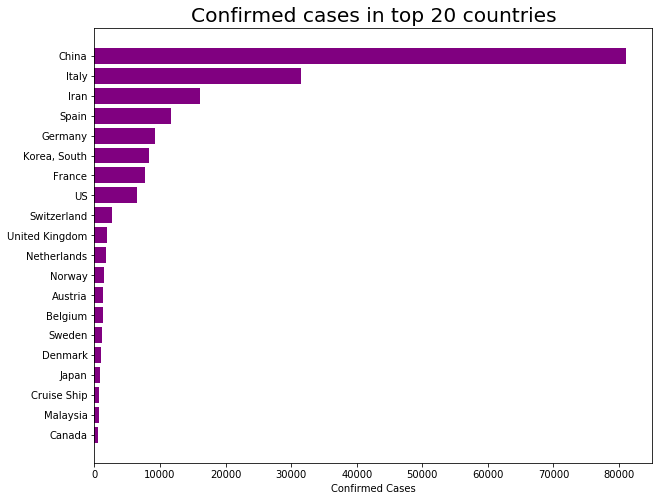

In [30]:
top_20_confirmed = confirmed_df.head(20).sort_values('Confirmed', ascending=True)
countries = top_20_confirmed['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_confirmed['Confirmed'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='purple')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Confirmed Cases')
plt.title('Confirmed cases in top 20 countries')
plt.show()

### Deaths

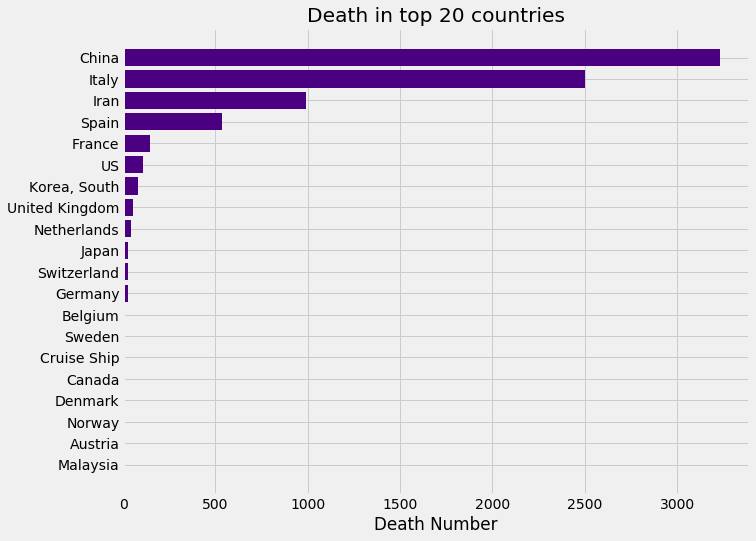

In [31]:
top_20_death= confirmed_df.head(20).sort_values('Deaths', ascending=True)
countries = top_20_death['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death['Deaths'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='indigo')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Number')
plt.title('Death in top 20 countries')
plt.show()

### Death Rate

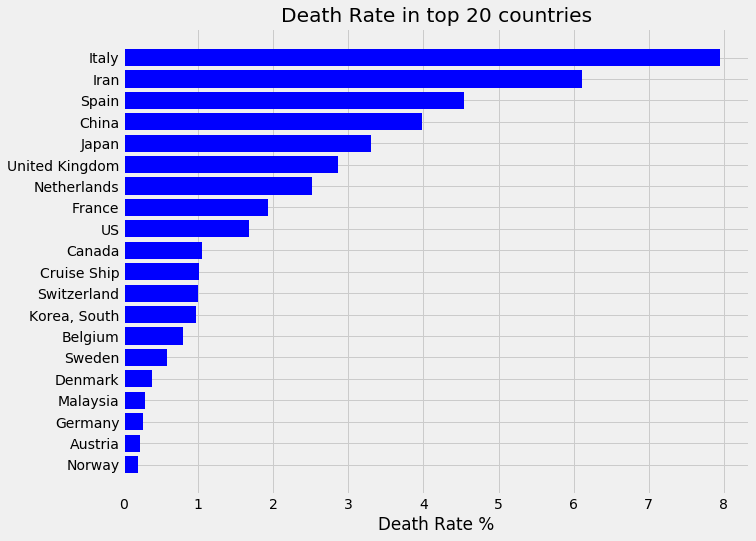

In [32]:
top_20_death_rate= confirmed_df.head(20).sort_values('Death Rate', ascending=True)
countries = top_20_death_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death_rate['Death Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='blue')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Rate %')
plt.title('Death Rate in top 20 countries')
plt.show()

### Recovered Number

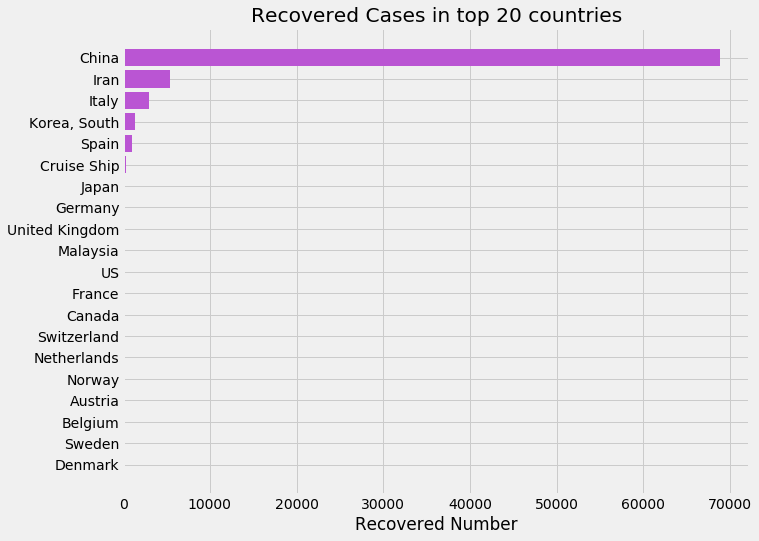

In [33]:
top_20_recovered= confirmed_df.head(20).sort_values('Recovered', ascending=True)
countries = top_20_recovered['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovered['Recovered'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumorchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovered Number')
plt.title('Recovered Cases in top 20 countries')
plt.show()

### Recovery Rate

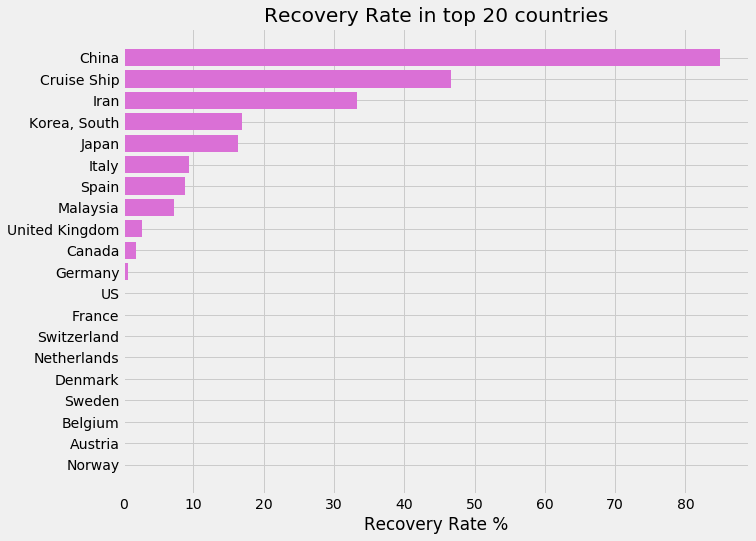

In [34]:
top_20_recovery_rate= confirmed_df.head(20).sort_values('Recovery Rate', ascending=True)
countries = top_20_recovery_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovery_rate['Recovery Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='orchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovery Rate %')
plt.title('Recovery Rate in top 20 countries')
plt.show()

### Active Cases

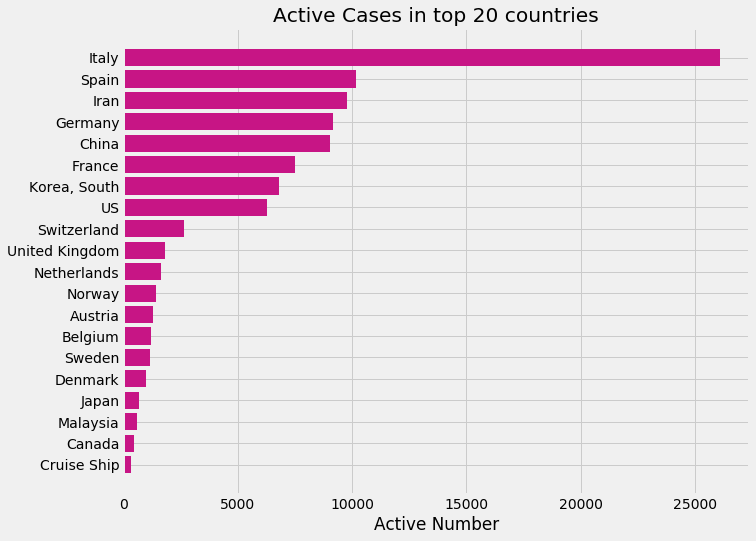

In [35]:
top_20_active= confirmed_df.head(20).sort_values('Active', ascending=True)
countries = top_20_active['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_active['Active'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumvioletred')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Active Number')
plt.title('Active Cases in top 20 countries')
plt.show()

### Comparison between China and the rest of the world

In [36]:
compare_df = pd.concat([China_current, ROW_current], axis=0)
compare_df.index = ['China', 'ROW']
compare_df

,Date,Confirmed,Deaths,Recovered,Active
China,2020-03-17,81058,3230,68798,9030
ROW,2020-03-17,116110,4675,12042,99393


# Case change over time

### China

C:\Users\Luna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


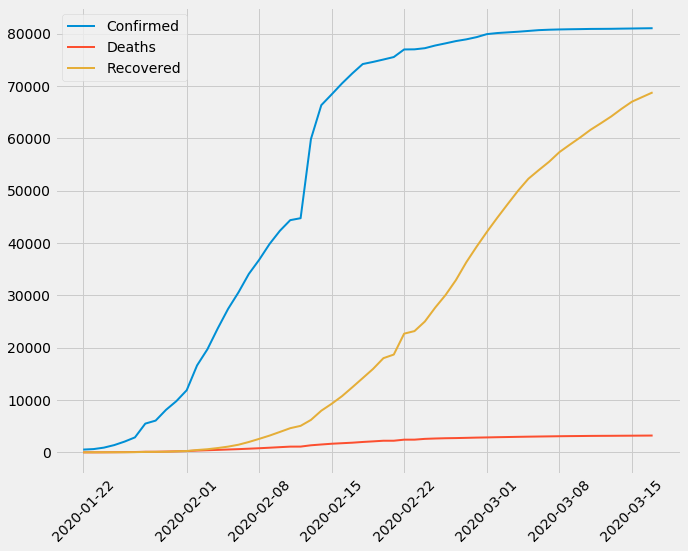

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(daily_china['Date'], daily_china['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_china['Date'], daily_china['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_china['Date'], daily_china['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### Rest of the World

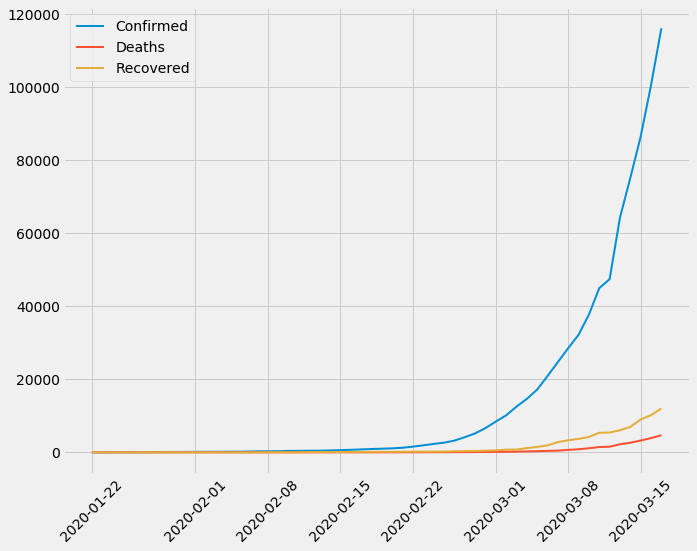

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(daily_ROW['Date'], daily_ROW['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_ROW['Date'], daily_ROW['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### Italy

In [39]:
for country in top_20_confirmed['Country/Region']:
    def change_over_time(country):
        x = df_grouped[df_grouped['Country/Region']==country]['Date']
        y1 = df_grouped[df_grouped['Country/Region']==country]['Confirmed']
        y2 = df_grouped[df_grouped['Country/Region']==country]['Deaths']
        y3 = df_grouped[df_grouped['Country/Region']==country]['Recovered']
        plt.figure(figsize=(10, 8))
        plt.plot(x, y1, label='Confirmed', linewidth=2, )
        plt.plot(x, y2, label='Deaths', linewidth=2)
        plt.plot(x, y3, label='Recovered', linewidth=2)
        plt.xticks(rotation='45')
        plt.legend()

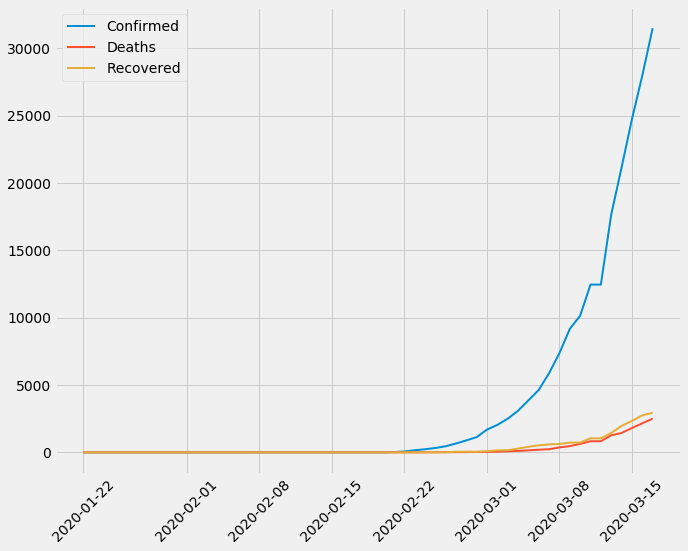

In [40]:
change_over_time('Italy')

### Spain

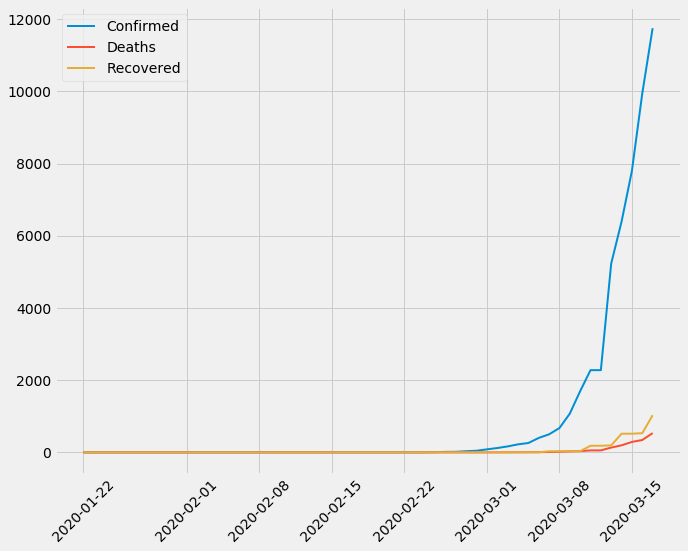

In [41]:
change_over_time('Spain')

### Iran

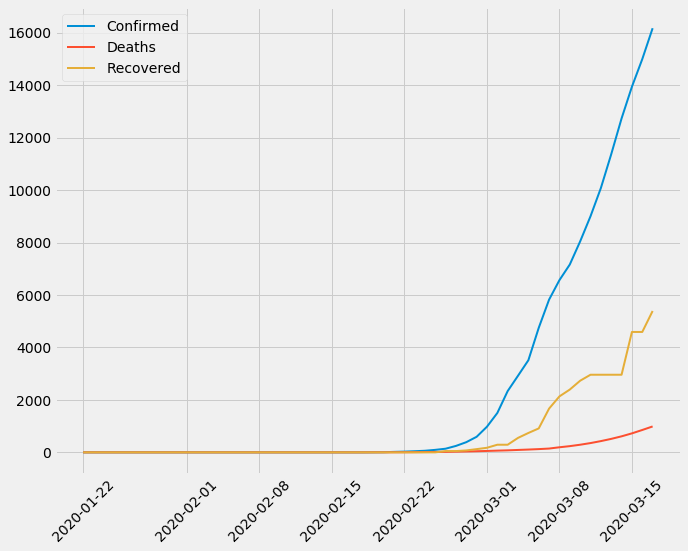

In [42]:
change_over_time('Iran')

### Japan

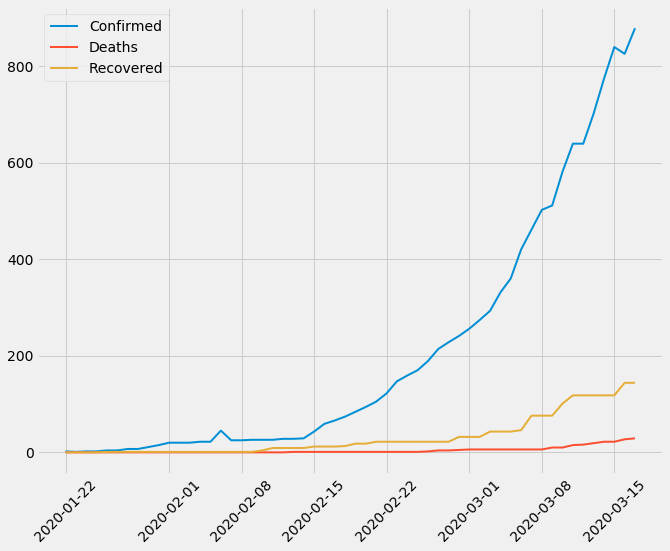

In [43]:
change_over_time('Japan')

### South Korea

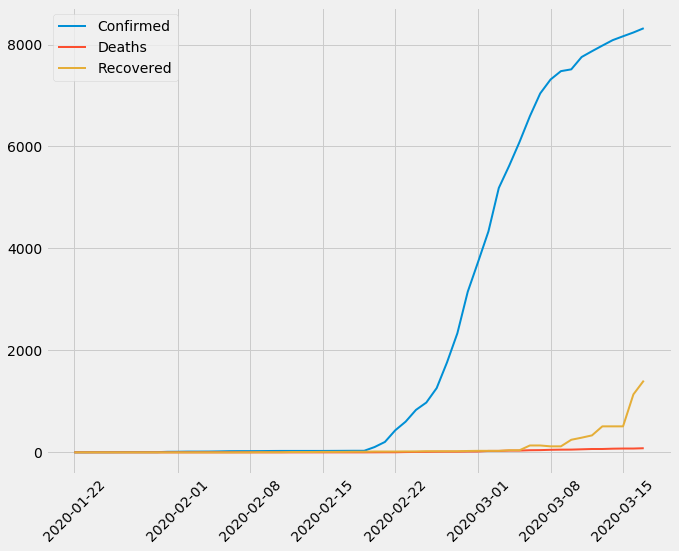

In [44]:
change_over_time('Korea, South')